In [ ]:
import osmnx

PLACE_NAME = "Kamppi, Helsinki, Finland"
graph = osmnx.graph_from_place(PLACE_NAME)

Check the data type of the graph:

In [ ]:
type(graph)

What we have here is a
[`networkx.MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html) object.


OSMnx’s graphs do not have a built-in method to plot them, but the package
comes with a function to do so:

In [ ]:
figure, ax = osmnx.plot_graph(graph)

Just as its GeoPandas and Pandas equivalents, `osmnx.plot_graph()` uses
matplotlib. The function returns a `(figure, axes)` tuple, that can be used to
modify the figure using all matplotlib functions we already got to know.

We can see that our graph contains nodes (the points) and edges (the
lines) that connects those nodes to each other.



### Convert a graph to `GeoDataFrame`s

The street network we just downloaded is a *graph*, more specifically a
`networkx.MultiDiGraph`. Its main purpose is to represent the topological
relationships between nodes and the links (edges) between them. Sometimes, it
is more convenient to have the underlying geodata in `geopandas.GeoDataFrame`s.
OSMnx comes with a convenient function that converts a graph into two geo-data
frames, one for nodes, and one for edges:
[`osmnx.graph_to_gdfs()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils_graph.graph_to_gdfs).

In [ ]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [ ]:
nodes.head()

In [ ]:
edges.head()

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot
them using the same functions and tools as we have used before.



### Place polygon

Let’s also plot the polygon that represents our area of interest (Kamppi,
Helsinki). We can retrieve the polygon geometry using the
[osmnx.geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf)
function.

In [ ]:
area = osmnx.geocode_to_gdf(PLACE_NAME)

As the name of the function already tells us, it returns a GeoDataFrame object
based on the specified place name query.  Let’s still verify the data type:

In [ ]:
type(area)

Let’s also have a look at the data:

In [ ]:
area

In [ ]:
area.plot()

### Building footprints

Besides network data, OSMnx can also download any other data contained in the OpenStreetMap database. This includes, for instance, building footprints, and different points-of-interests (POIs). To download arbitrary geometries, filtered by [OSM tags](https://wiki.openstreetmap.org/wiki/Map_features) and a place name, use [`osmnx.features_from_place()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geometries.geometries_from_place) [geometries is soon deprecated - let's use features instead]. The tag to retrieve all [buildings](https://wiki.openstreetmap.org/wiki/Buildings) is `building = yes`.

In [ ]:
buildings = osmnx.features_from_place(
    PLACE_NAME,
    {"building": True},
)

In [ ]:
len(buildings)

In [ ]:
buildings.head()

As you can see, there are several columns in `buildings`. Each column contains
information about a specific tag that OpenStreetMap contributors have added.
Each tag consists of a key (the column name), and a values (for example
`building=yes` or `building=school`). Read more about tags and tagging
practices in the [OpenStreetMap
wiki](https://wiki.openstreetmap.org/wiki/Tags).

In [ ]:
buildings.columns

### Points-of-interest

Point-of-interest (POI) is a generic concept that describes point locations
that represent places of interest. As `osmnx.features_from_place()` can download any geometry data contained in the OpenStreetMap database, it can also be used to download any kind of POI data. 


In OpenStreetMap, many POIs are described using the [`amenity`
tag](https://wiki.openstreetmap.org/wiki/Key:amenity).  We can, for example,
retrieve all restaurant locations by querying `amenity=restaurant`.

In [ ]:
restaurants = osmnx.features_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
len(restaurants)

As we can see, there are quite many restaurants in the area.

Let’s explore what kind of attributes we have in our restaurants GeoDataFrame:

In [ ]:
restaurants.columns.values

As you can see, there is quite a lot of (potential) information related to the
amenities. Let’s subset the columns and inspect the data further. Can we
extract all restaurants’ names, address, and opening hours?

In [ ]:
# Select some useful cols and print
interesting_columns = [
    "name",
    "opening_hours",
    "addr:city",
    "addr:country",
    "addr:housenumber",
    "addr:postcode",
    "addr:street"
]

# Print only selected cols
restaurants[interesting_columns].head(10)

:::{tip}
if some of the information needs an update, head over to [openstreetmap.org](https://openstreetmap.org) and edit the source data!
:::



### Parks and green areas

Let’s try to fetch all public parks in the Kamppi area. In OpenStreetMap,
[parks hould be tagged](https://wiki.openstreetmap.org/wiki/Map_features) as
`leisure = park`.  Smaller green areas (*puistikot*) are sometimes also tagged
`landuse = grass`. We can combine multiple tags in one data query.

In [ ]:
parks = osmnx.features_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)

In [ ]:
parks.head()

In [ ]:
parks.plot(color="green")

### Plotting the data

Let’s create a map out of the streets, buildings, restaurants, and the area polygon.

In [ ]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)

Cool! Now we have a map where we have plotted the restaurants, buildings,
streets and the boundaries of the selected region of ‘Kamppi’ in Helsinki. And
all of this required only a few lines of code. Pretty neat! 



:::{admonition} Check your understanding
:class: hint

Retrieve OpenStreetMap data from some other area! Download these elements using
OSMnx functions from your area of interest:
    
- Extent of the area using `geocode_to_gdf()`
- Street network using `graph_from_place()`, and convert to geo-data frame using
  `graph_to_gdfs()`
- Building footprints (and other geometries) using `geometries_from_place()`
  and appropriate tags.
    
*Note, the larger the area you choose, the longer it takes to retrieve data
from the API!*
:::

/var/folders/ll/4g6y_2fn4yzdp4jvhp6ptzm40000gn/T/ipykernel_33015/3550699350.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower right')


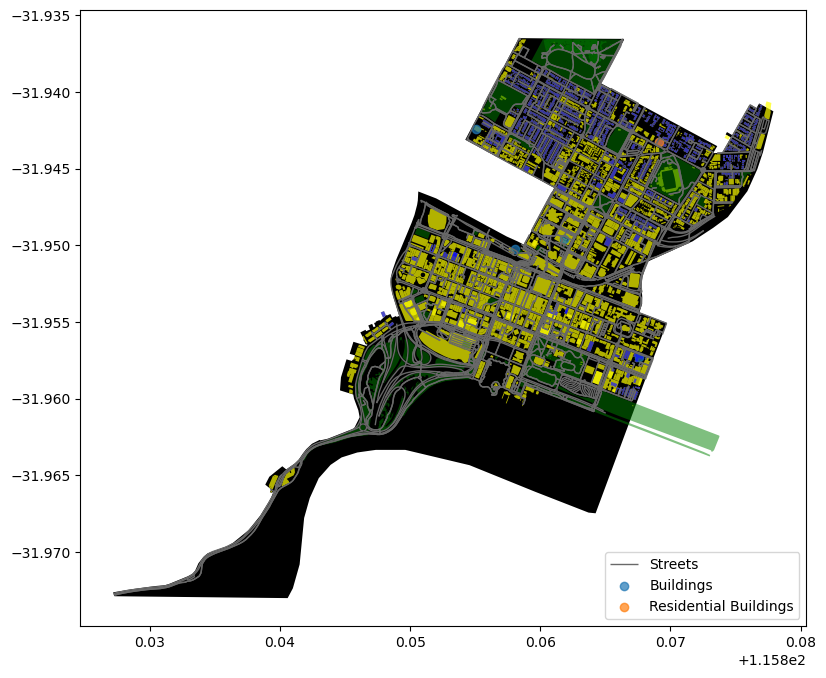

In [56]:
import osmnx
import matplotlib.pyplot as plt

# Specify the name that is used to search for the data
MY_PLACE = "Perth, Western Australia"
perth_area = osmnx.geocode_to_gdf(MY_PLACE)

# Get street network
G = osmnx.graph_from_place(MY_PLACE)
nodes, edges = osmnx.graph_to_gdfs(G)

# Get building footprints
tags = {'building': True}
perth_buildings = osmnx.features_from_place(MY_PLACE, tags)

# Plot the data
figure, ax = plt.subplots(figsize=(12, 8))

# Plot the footprint
perth_area.plot(ax=ax, facecolor="black", label='City Area')

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray", label='Streets')

# Plot buildings
perth_buildings.plot(ax=ax, facecolor="yellow", alpha=0.7, label='Buildings')

# Get residential buildings specifically
residential_tags = {'building': 'residential'}
perth_residential = osmnx.features_from_place(MY_PLACE, residential_tags)

# Plot residential buildings
perth_residential.plot(ax=ax, facecolor="blue", alpha=0.7, label='Residential Buildings')

# Get greenspaces using relevant tags
green_tags = {'leisure': ['park', 'garden'], 'landuse': ['grass', 'recreation_ground']}
perth_greenspaces = osmnx.features_from_place(MY_PLACE, green_tags)

# Plot greenspaces
perth_greenspaces.plot(ax=ax, facecolor="green", alpha=0.5, label='Greenspaces')

# Add a legend
ax.legend(loc='lower right')

# Show the plot
plt.show()


## Advanced reading

To analyse OpenStreetMap data over large areas, it is often more efficient and
meaningful to download the data all at once, instead of separate queries to the
API. Such data dumps from OpenStreetMap are available in various file formats,
OSM [Protocolbuffer Binary
Format](https://wiki.openstreetmap.org/wiki/PBF_Format) (PBF) being one of
them. Data extracts covering whole countries and continents are available, for
instance, at [download.geofabrik.de](https://download.geofabrik.de/).

[Pyrosm](https://pyrosm.readthedocs.io/) is a Python package for reading
OpenStreetMap data from PBF files into `geopandas.GeoDataFrames`. Pyrosm makes
it easy to extract road networks, buildings, Points of Interest (POI), landuse,
natural elements, administrative boundaries and much more - similar to OSMnx,
but taylored to analyses of large areas.  While OSMnx reads the data from the
Overpass API, pyrosm reads the data from a local PBF file.

Read more about fetching and using pbf files as a source for analysing
OpenStreetMap data in Python from the [pyrosm
documentation](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one).